In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Function to compute flux-weighted averages

In [2]:
def flux_av(Flux,Err,fun):
    d = Flux
    w = 1/Err
    if fun==0:
        try:
            return (d * w).sum() / w.sum()
        except ZeroDivisionError:
            return d.mean()
    if fun==1:
        return np.mean(Err)

In [3]:
data_input=pd.read_csv('/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/Charlotte_ZTF18abuamgo_ATLAS_RAW.txt',delim_whitespace='true',comment='#')

Manual clipping - remove bad points with chi/N>5

In [4]:
data_input=data_input[data_input['chi/N']<5]

Split into cyan and orange points

In [5]:
cyan_input=data_input[data_input.F=='c']
orange_input=data_input[data_input.F=='o']

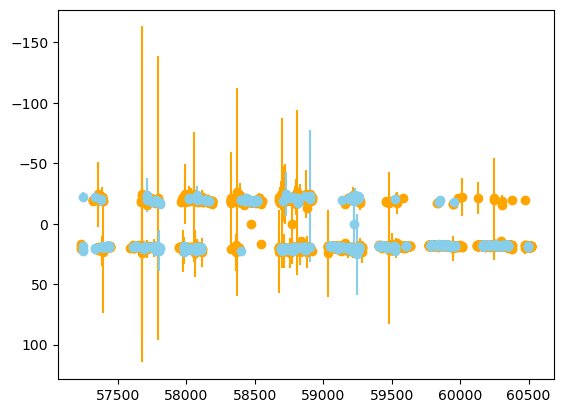

In [6]:
plt.errorbar(orange_input['MJD'],orange_input['m'],yerr=orange_input['dm'],ls='None',marker='o',color='orange')
plt.errorbar(cyan_input['MJD'],cyan_input['m'],yerr=cyan_input['dm'],ls='None',marker='o',color='skyblue')
plt.gca().invert_yaxis()

Remove points where flux is negative

In [7]:
cyan=cyan_input[cyan_input.uJy>0]
orange=orange_input[orange_input.uJy>0]

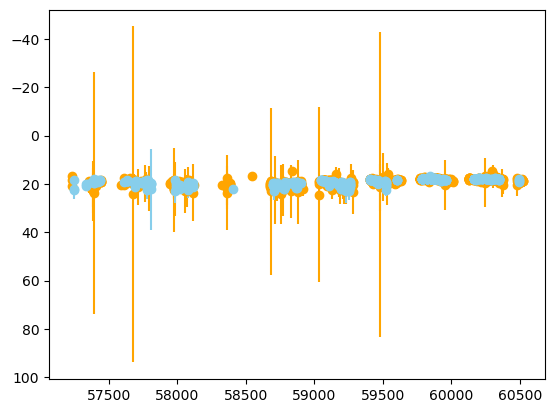

In [8]:
plt.errorbar(orange['MJD'],orange['m'],yerr=orange['dm'],ls='None',marker='o',color='orange')
plt.errorbar(cyan['MJD'],cyan['m'],yerr=cyan['dm'],ls='None',marker='o',color='skyblue')
plt.gca().invert_yaxis()

Group data and perform flux weighted average

In [9]:
cyan_clean=cyan.groupby(np.round(cyan['MJD']),as_index=False).agg({'MJD':lambda z: np.median(z),
     'uJy':lambda y: flux_av(y,cyan.loc[y.index,'duJy'],0),
     'duJy': lambda y: (flux_av(cyan.loc[y.index,'uJy'],y,1)),
     'F':lambda z: z.iloc[0],
     'err':lambda z: np.median(z),
     'chi/N':lambda z: np.median(z),
     'RA':lambda z: np.median(z),
     'Dec':lambda z: np.median(z),
     'x':lambda z: np.median(z),
     'y':lambda z: np.median(z),
     'maj':lambda z: np.median(z),
     'min':lambda z: np.median(z),
     'phi':lambda z: np.median(z),
     'apfit':lambda z: np.median(z),
     'mag5sig':lambda z: np.median(z),
     'Sky':lambda z: np.median(z),
     'Obs':lambda z: z.iloc[0]})

orange_clean=orange.groupby(np.round(orange['MJD']),as_index=False).agg({'MJD':lambda z: np.median(z),
     'uJy':lambda y: flux_av(y,orange.loc[y.index,'duJy'],0),
     'duJy': lambda y: (flux_av(orange.loc[y.index,'uJy'],y,1)),
     'F':lambda z: z.iloc[0],
     'err':lambda z: np.median(z),
     'chi/N':lambda z: np.median(z),
     'RA':lambda z: np.median(z),
     'Dec':lambda z: np.median(z),
     'x':lambda z: np.median(z),
     'y':lambda z: np.median(z),
     'maj':lambda z: np.median(z),
     'min':lambda z: np.median(z),
     'phi':lambda z: np.median(z),
     'apfit':lambda z: np.median(z),
     'mag5sig':lambda z: np.median(z),
     'Sky':lambda z: np.median(z),
     'Obs':lambda z: z.iloc[0]})

orange_clean['m']=(-2.5*np.log10(orange_clean.uJy*(1e-6)))+8.9
orange_clean['dm']=1.083*(orange_clean.duJy/orange_clean.uJy)
orange_clean['Tel']='ATLAS'

cyan_clean['m']=(-2.5*np.log10(cyan_clean.uJy*(1e-6)))+8.9
cyan_clean['dm']=1.083*(cyan_clean.duJy/cyan_clean.uJy)
cyan_clean['Tel']='ATLAS'

Manual clipping - selecting only 3-sigma detections, and removing a few bad points where the sky is too bright)

In [10]:
cyan_sigclip=cyan_clean[((cyan_clean.m/abs(cyan_clean.dm))>3)&((cyan_clean.Sky>18))]
orange_sigclip=orange_clean[((orange_clean.m/abs(orange_clean.dm))>3)&((orange_clean.Sky>18))]

(57000.0, 60700.0)

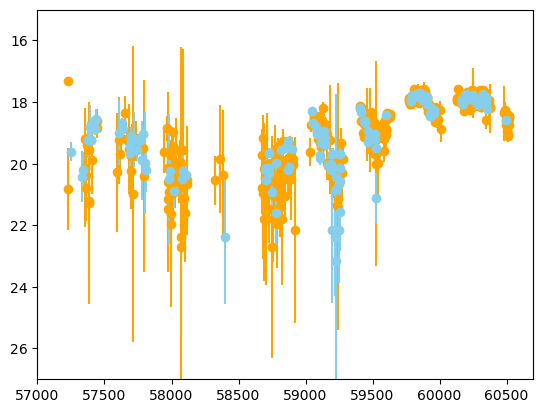

In [11]:
plt.errorbar(orange_sigclip['MJD'],orange_sigclip['m'],yerr=abs(orange_sigclip['dm']),ls='None',marker='o',color='orange')
plt.errorbar(cyan_sigclip['MJD'],cyan_sigclip['m'],yerr=cyan_sigclip['dm'],ls='None',marker='o',color='skyblue')

plt.gca().invert_yaxis()
plt.ylim([27,15])
plt.xlim([57000,60700])

My code to output results

In [12]:
file_path_c = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/ATLAS_clean_c_filter.csv'
cyan_sigclip.to_csv(file_path_c, index=False)

file_path_o = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/ATLAS_clean_o_filter.csv'
orange_sigclip.to_csv(file_path_o, index=False)